In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
red = pd.read_csv("winequality-red.csv", sep=";")
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white = pd.read_csv("winequality-white.csv", sep=";")
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### A. Параметры и качество белого вина (12 признаков, 4898 образцов) по данным второго файла,

In [ ]:
def print_data(data: pd.DataFrame):
    print(f"Размерность: {data.shape}")
    display(data.head())


data_A = white.copy()
print_data(data_A)

Размерность: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


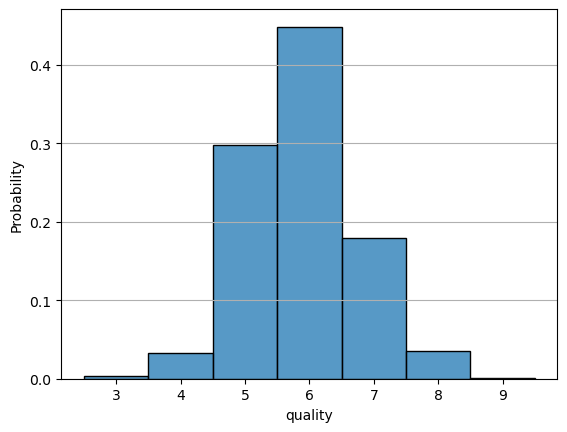

In [ ]:
def quality_hist(data: pd.DataFrame):
    sns.histplot(data, x="quality", discrete=True, stat="probability")
    plt.grid(axis="y")

quality_hist(data_A)

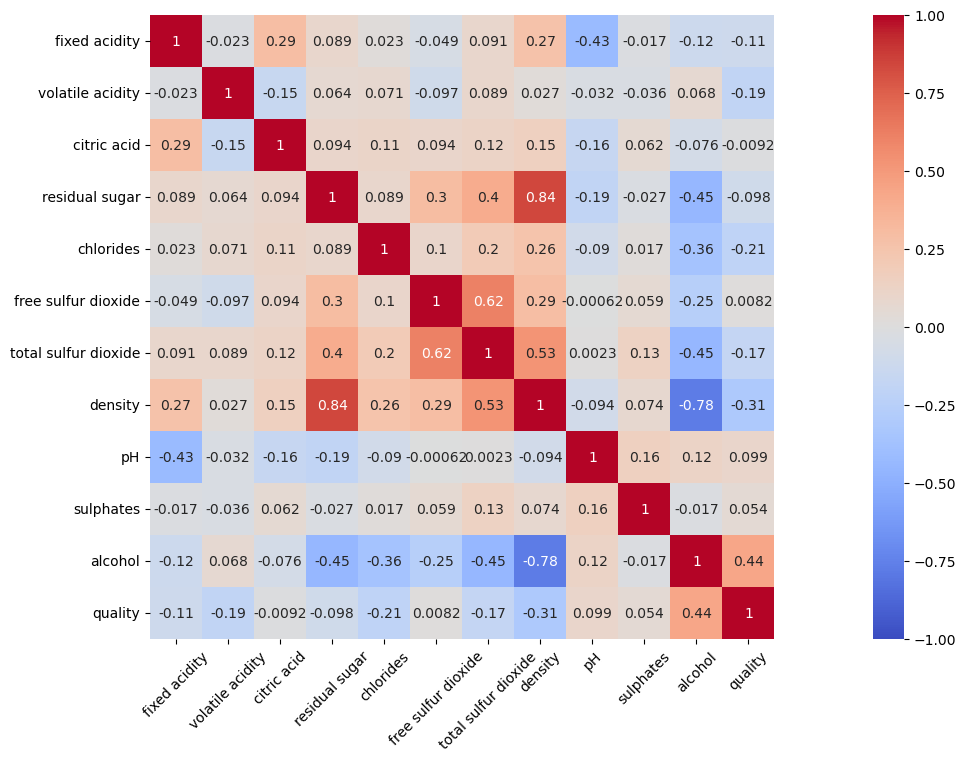

In [ ]:
def corrmap(data: pd.DataFrame):
    plt.figure(figsize=(20, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, square=True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    
corrmap(data_A)

In [ ]:
def standartize(data: pd.DataFrame) -> pd.DataFrame:
    nenorm = data.copy()
    numeric = data.drop(columns=["quality", "is_red"], errors='ignore')
    args = numeric.agg(("mean", "std"))
    norm = (numeric - args.loc["mean"]) / args.loc["std"]
    nenorm[list(norm.columns.values)] = norm
    display(norm.describe())
    return nenorm

data_A_norm = standartize(data_A)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.713739e-16,4.294011e-16,2.321087e-17,-1.044489e-16,3.133467e-16,-1.595747e-17,-4.642174e-17,3.244880e-14,-1.183754e-15,-8.247112e-16,-3.713739e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00


### B. Параметры и качество вина Vinho Verde (12 признаков, 6497 образцов), по данным обоих файлов.

In [ ]:
data_B = pd.concat((red, white), ignore_index=True)
print_data(data_B)

Размерность: (6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


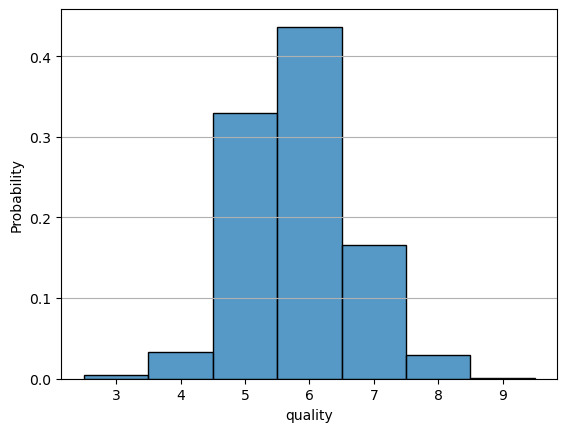

In [ ]:
quality_hist(data_B)

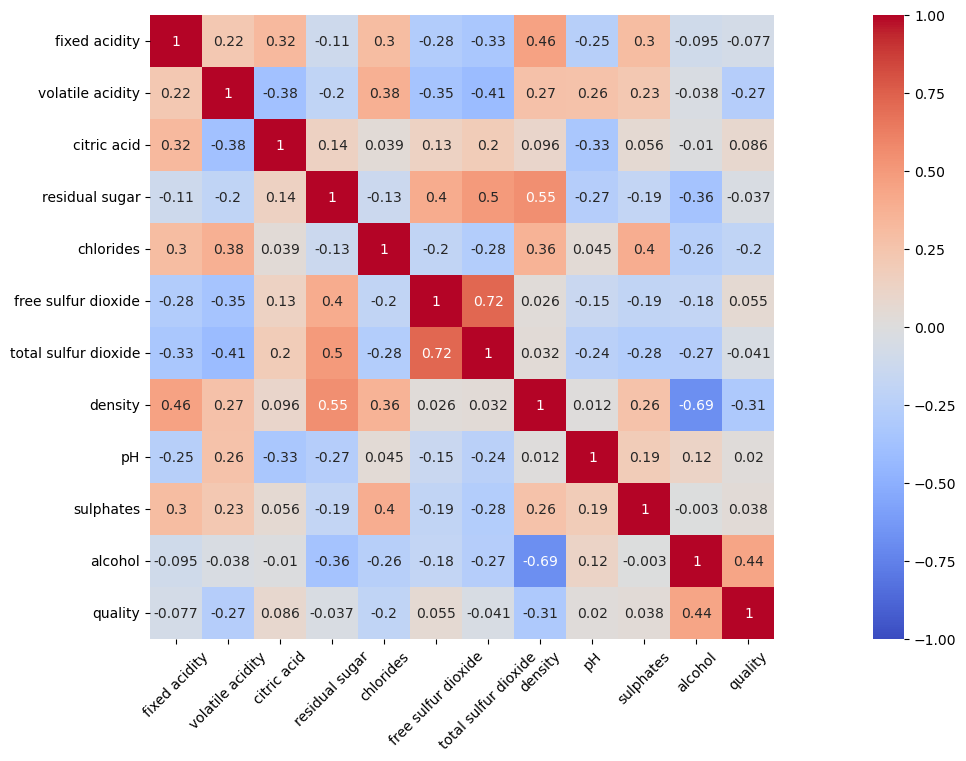

In [ ]:
corrmap(data_B)

In [ ]:
data_B_norm = standartize(data_B)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.899540e-16,1.049902e-16,0.000000,3.499672e-17,3.499672e-17,-8.749179e-17,-6.999344e-17,-3.534668e-15,2.712246e-15,-5.599475e-16,1.014905e-15
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,-6.288845e-01,-6.661100e-01,-0.472297,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,-1.660764e-01,-3.016707e-01,-0.059409,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,3.738663e-01,3.664680e-01,0.491108,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,6.698910e+00,7.533774e+00,9.230570,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00


### C. Параметры и качество вина Vinho Verde (13 признаков, 6497 образцов), по данным обоих файлов, введя бинарный признак для отличия красного и белого вина.

In [ ]:
red_ = red.copy()
red_.insert(11, "is_red", 1)
white_ = white.copy()
white_.insert(11, "is_red", 0)
data_C = pd.concat((red_, white_), ignore_index=True)

print_data(data_C)

Размерность: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


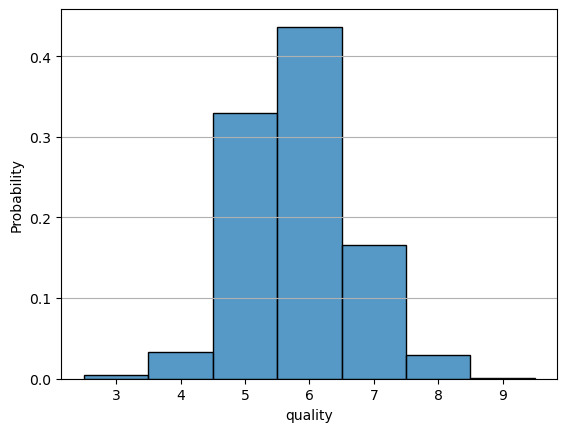

In [ ]:
quality_hist(data_C)

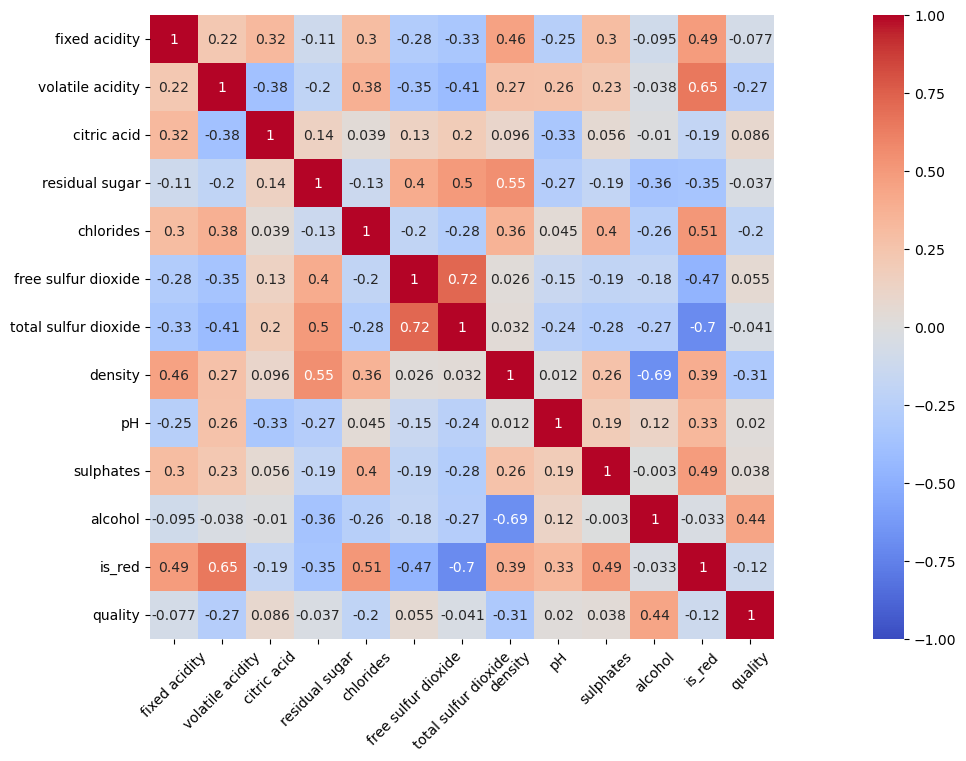

In [ ]:
corrmap(data_C)

In [ ]:
data_C_norm = standartize(data_C)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.899540e-16,1.049902e-16,0.000000,3.499672e-17,3.499672e-17,-8.749179e-17,-6.999344e-17,-3.534668e-15,2.712246e-15,-5.599475e-16,1.014905e-15
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,-6.288845e-01,-6.661100e-01,-0.472297,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,-1.660764e-01,-3.016707e-01,-0.059409,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,3.738663e-01,3.664680e-01,0.491108,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,6.698910e+00,7.533774e+00,9.230570,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00
